In [1]:
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_train = pd.read_csv('dacon_real_perfect_train.csv',encoding = 'UTF-8')
df_train

,transaction_year,transaction_month,transaction_date1,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,...,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,household_loan,mean_loan,mortgage loan
0,2006,1,11,0,5584,1,1999,47.4300,6,37.585965,...,91120,65.63,46,1.0,1.0,corridor,215000000,5.69,5.79,5.64
1,2006,1,11,1,5584,1,1999,44.3700,8,37.585965,...,91119,61.39,10,2.0,1.0,corridor,200000000,5.69,5.79,5.64
2,2006,1,11,2,5059,1,1992,54.7000,8,37.580511,...,8430,72.36,201,2.0,1.0,corridor,168000000,5.69,5.79,5.64
3,2006,1,11,3,2816,1,1993,64.6600,11,37.580324,...,5839,87.30,284,2.0,1.0,corridor,165000000,5.69,5.79,5.64
4,2006,1,11,4,2816,1,1993,106.6200,7,37.580324,...,5836,127.74,112,4.0,2.0,stairway,280000000,5.69,5.79,5.64
5,2006,1,11,5,2815,1,2000,84.9200,9,37.575381,...,5831,109.88,454,3.0,2.0,stairway,415000000,5.69,5.79,5.64
6,2006,1,11,6,2815,1,2000,60.0000,13,37.575381,...,5833,84.33,207,3.0,1.0,corridor,267000000,5.69,5.79,5.64
7,2006,1,11,7,9867,1,2005,84.7600,10,37.559200,...,11862,104.30,82,3.0,2.0,stairway,415000000,5.69,5.79,5.64
8,2006,1,11,8,2818,1,1999,84.8800,18,37.555060,...,5843,107.65,576,3.0,2.0,stairway,310000000,5.69,5.79,5.64
9,2006,1,11,9,2817,1,2002,59.9400,12,37.549828,...,5842,85.90,864,3.0,1.0,corridor,319000000,5.69,5.79,5.64


In [4]:
len(df_train)

1601458

In [5]:
df_train.isna().sum()

transaction_year                          0
transaction_month                         0
transaction_date1                         0
key                                       0
apartment_id                              0
city                                      0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site            0
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 0
lowest_building_in_sites                  0
heat_type                              2017
heat_fuel                              9667
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                      

In [6]:
len(df_train[df_train['heat_fuel']=="-"])

8971

In [7]:
len(df_train[df_train['heat_fuel'].isna()==True])

9667

In [8]:
df_train.dtypes

transaction_year                        int64
transaction_month                       int64
transaction_date1                       int64
key                                     int64
apartment_id                            int64
city                                    int64
year_of_completion                      int64
exclusive_use_area                    float64
floor                                   int64
latitude                              float64
longitude                             float64
address_by_law                          int64
total_parking_capacity_in_site        float64
total_household_count_in_sites          int64
apartment_building_count_in_sites       int64
tallest_building_in_sites             float64
lowest_building_in_sites              float64
heat_type                              object
heat_fuel                              object
room_id                                 int64
supply_area                           float64
total_household_count_of_area_type

In [9]:
df_train.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,transaction_year,transaction_month,transaction_date1,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price,household_loan,mean_loan,mortgage loan
transaction_year,1.0,-0.066,0.0029,0.99,0.19,0.078,0.16,0.073,0.033,0.076,-0.078,-0.077,0.023,0.042,0.059,0.071,0.022,0.015,0.084,-0.038,0.015,0.024,0.29,-0.9,-0.92,-0.91
transaction_month,-0.066,1.0,-0.0097,0.011,0.021,-0.026,0.018,0.014,0.0086,-0.025,0.026,0.025,0.0092,0.0098,0.0061,0.017,0.0098,0.0045,0.017,0.003,-0.00021,-0.00038,0.0023,-0.02,-0.013,-0.01
transaction_date1,0.0029,-0.0097,1.0,0.0056,0.005,0.0021,0.0057,0.0049,0.0031,0.002,-0.0019,-0.0021,0.0019,0.0031,0.0025,0.0069,0.0053,0.0023,0.0058,-0.0011,0.0019,0.0021,0.011,-0.0027,-0.003,-0.0029
key,0.99,0.011,0.0056,1.0,0.19,0.083,0.16,0.071,0.033,0.082,-0.083,-0.082,0.022,0.042,0.058,0.07,0.02,0.015,0.082,-0.037,0.014,0.024,0.3,-0.89,-0.92,-0.88
apartment_id,0.19,0.021,0.005,0.19,1.0,-0.17,0.64,0.16,0.097,-0.17,0.17,0.17,0.062,0.027,0.088,0.22,0.13,0.26,0.2,-0.18,0.037,0.088,0.16,-0.16,-0.17,-0.17
city,0.078,-0.026,0.0021,0.083,-0.17,1.0,-0.078,-0.088,-0.15,1.0,-1.0,-1.0,-0.043,0.1,0.15,-0.25,-0.3,-0.29,-0.092,0.023,-0.021,-0.011,0.4,-0.095,-0.099,-0.087
year_of_completion,0.16,0.018,0.0057,0.16,0.64,-0.078,1.0,0.24,0.26,-0.079,0.073,0.077,-0.079,0.02,0.042,0.51,0.28,0.15,0.32,-0.12,0.067,0.12,0.13,-0.14,-0.14,-0.14
exclusive_use_area,0.073,0.014,0.0049,0.071,0.16,-0.088,0.24,1.0,0.17,-0.094,0.089,0.089,0.031,-0.02,0.019,0.29,0.22,0.048,0.98,-0.15,0.23,0.14,0.52,-0.073,-0.072,-0.076
floor,0.033,0.0086,0.0031,0.033,0.097,-0.15,0.26,0.17,1.0,-0.15,0.15,0.15,0.047,0.12,0.013,0.54,0.44,0.11,0.22,0.032,0.024,0.03,0.13,-0.028,-0.028,-0.03
latitude,0.076,-0.025,0.002,0.082,-0.17,1.0,-0.079,-0.094,-0.15,1.0,-0.99,-1.0,-0.044,0.1,0.15,-0.25,-0.3,-0.3,-0.097,0.023,-0.023,-0.012,0.39,-0.094,-0.097,-0.085


In [10]:
set(df_train['heat_fuel'])

{'-', 'cogeneration', 'gas', nan}

In [11]:
df_train['heat_fuel'].value_counts()

gas             1204679
cogeneration     378141
-                  8971
Name: heat_fuel, dtype: int64

In [12]:
1204679+378141+8971+9667

1601458

In [13]:
fill_heat_fuel.columns

NameError: name 'fill_heat_fuel' is not defined

In [ ]:
fill_heat_fuel=pd.crosstab(df_train.year_of_completion, df_train.heat_fuel, margins=False)
fill_heat_fuel=fill_heat_fuel.reset_index()

In [ ]:
fill_heat_fuel.head()

In [ ]:
fill_heat_fuel[fill_heat_fuel['cogeneration']>=fill_heat_fuel['gas']]

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

x=fill_heat_fuel['year_of_completion']
y_con = fill_heat_fuel['cogeneration']
y_gas = fill_heat_fuel['gas']

plt.plot(x,y_con,'b',label='cogeneration')
plt.plot(x,y_gas,'r',label='gas')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('matplotlib sample')
plt.legend(loc='upper right')
plt.show()



In [ ]:
heat_fuel_na1=df_train[df_train['front_door_structure']=="-"]
heat_fuel_na2=df_train[df_train['front_door_structure'].isna()==True]

In [ ]:
heat_fuel_na=pd.concat([heat_fuel_na1,heat_fuel_na2],axis=0)
heat_fuel_na=heat_fuel_na.reset_index()

In [ ]:
type(heat_fuel_na['year_of_completion'][0])

In [ ]:
list_con_year=[1971,1978,1988,2008]

In [ ]:
for i in range(len(heat_fuel_na)):
    if heat_fuel_na['year_of_completion'][i] in list_con_year:
        heat_fuel_na['heat_fuel'][i]="cogeneration"
    else:
        heat_fuel_na['heat_fuel'][i]="gas"
    if i%100==0:
        print(i)


In [ ]:
del heat_fuel_na['index']

In [ ]:
heat_fuel_na['year_of_completion'].value_counts()

In [ ]:
df_train=pd.merge(df_train,heat_fuel_na,how='left',on=['transaction_year', 'transaction_month', 'transaction_date1', 'key',
       'apartment_id', 'city', 'year_of_completion', 'exclusive_use_area',
       'floor', 'latitude', 'longitude', 'address_by_law',
       'total_parking_capacity_in_site', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type', 'room_count',
       'bathroom_count', 'front_door_structure', 'transaction_real_price',
       'household_loan', 'mean_loan', 'mortgage loan'])

In [ ]:
fill_door_fuel[fill_door_fuel['cogeneration']>=fill_door_fuel['gas']]

In [17]:
fill_door_fuel=pd.crosstab(df_train.year_of_completion, df_train.front_door_structure, margins=False)
fill_door_fuel=fill_door_fuel.reset_index()
fill_door_fuel.head()

front_door_structure,year_of_completion,-,corridor,mixed,stairway
0,1962,20,106,0,93
1,1966,0,0,0,43
2,1968,0,38,0,75
3,1969,0,98,0,0
4,1970,0,25,0,304


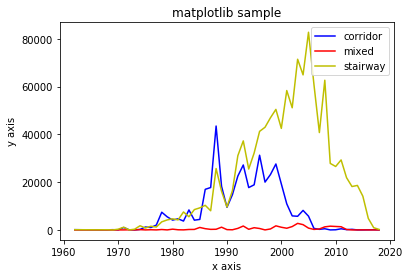

In [18]:
from matplotlib import pyplot as plt
import numpy as np

x=fill_door_fuel['year_of_completion']
y_corr = fill_door_fuel['corridor']
y_mix = fill_door_fuel['mixed']
y_stair = fill_door_fuel['stairway']

plt.plot(x,y_corr,'b',label='corridor')
plt.plot(x,y_mix,'r',label='mixed')
plt.plot(x,y_stair,'y',label='stairway')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('matplotlib sample')
plt.legend(loc='upper right')
plt.show()


In [29]:
fill_door_fuel[fill_door_fuel['corridor']>fill_door_fuel['stairway']]['year_of_completion'].values

array([1962, 1969, 1972, 1975, 1977, 1978, 1979, 1981, 1983, 1986, 1987,
       1988, 1989], dtype=int64)

In [28]:
fill_door_fuel[fill_door_fuel['mixed']>fill_door_fuel['corridor']]['year_of_completion'].values


array([2007, 2008, 2009, 2010, 2011, 2012, 2015], dtype=int64)

In [21]:
fill_door_fuel[fill_door_fuel['mixed']>fill_door_fuel['stairway']]['year_of_completion']

6    1972
Name: year_of_completion, dtype: int64

In [30]:
heat_door_na1=df_train[df_train['front_door_structure']=="-"]
heat_door_na2=df_train[df_train['front_door_structure'].isna()==True]

In [47]:
len(heat_door_na1),len(heat_door_na2),

(21, 13892)

In [49]:
heat_door_na=pd.concat([heat_door_na1,heat_door_na2],axis=0)
heat_door_na=heat_door_na.reset_index()
len(heat_door_na)

13913

In [34]:
list_corr_best=[1962, 1969, 1972, 1975, 1977, 1978, 1979, 1981, 1983, 1986, 1987,1988, 1989]
list_mix_best=[1972]
list_not_stair=list_corr_best+list_mix_best
list_not_stair

[1962,
 1969,
 1972,
 1975,
 1977,
 1978,
 1979,
 1981,
 1983,
 1986,
 1987,
 1988,
 1989,
 1972]

In [35]:
for i in range(len(heat_door_na)):
    if heat_door_na['year_of_completion'][i] not in list_not_stair:
        heat_door_na['front_door_structure'][i]="stairway"
    elif heat_door_na['year_of_completion'][i] in list_corr_best:
        heat_door_na['front_door_structure'][i]="corridor"
    else:
        heat_door_na['front_door_structure'][i]="mixed"
    if i%100==0:
        print(i)


C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900


In [67]:
heat_door_no_na1=df_train[df_train['front_door_structure'].isna()==False]
heat_door_no_na=heat_door_no_na1[heat_door_no_na1['front_door_structure']!="-"]

heat_door=pd.concat([heat_door_na,heat_door_no_na],axis=0)


C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [68]:
len(heat_door)

1601458

In [69]:
heat_door.to_csv("front_door_perfect.csv", encoding='utf-8', index=False)

In [45]:
len(df_train)

1601479